For this phase we are assigned to do EDA, data cleaning and do some visualization through data cleaning, in my coding and parsing I did most of the data cleaning such as filling all NAN with zeroes, but there are more data, like data type, and 

In [1]:
%matplotlib inline
from numpy import * # everything 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.options.display.max_rows = 10
car_df = pd.read_csv("result.csv")
car_df

,Year,Brand,Model,Title,Mile,Price,Transmition,EXT_COLOR,INT_COLOR,Derivtrain,zipcode
0,2007,Mazda,CX-7 Sport,USED,75218,5995,Automatic,White,Beige,FWD,92521
1,2017,Volvo,S90 T5 Momentum,VOLVO CERTIFIED,0,26000,Automatic,Blue,Orange,FWD,92521
2,2020,BMW,740i,NEW,0,93945,Automatic,Gray,Black,RWD,92521
3,2008,Chevrolet,Tahoe Hybrid,USED,95000,14499,CVT,Black,Beige,RWD,92521
4,2019,BMW,330i,NEW,0,46545,Automatic,Blue,Black,RWD,92521
...,...,...,...,...,...,...,...,...,...,...,...
29081,2015,Toyota,Avalon Hybrid XLE Premium,USED,57393,14999,CVT,Gray,Gray,FWD,89107
29082,2016,BMW,M235 i,USED,35782,20999,Manual,Blue,Black,RWD,89107
29083,2015,Hyundai,Azera Base,USED,64245,12999,Automatic,Black,Black,FWD,89107
29084,2020,Kia,Rio S,NEW,0,15476,CVT,Black,Black,FWD,89107


Let's see what is our car data years domain, and title of cars we have in our dataset.

In [2]:
print("Car Years domain: " ,sorted(car_df.Year.unique()))
print("Title of cars in data: " , (car_df.Title.unique()))

Car Years domain:  [1955, 1969, 1971, 1973, 1974, 1976, 1977, 1978, 1981, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
Title of cars in data:  ['USED' 'VOLVO CERTIFIED' 'NEW' 'HONDA CERTIFIED' 'VOLKSWAGEN CERTIFIED'
 'AUDI CERTIFIED' 'LEXUS CERTIFIED' 'SUBARU CERTIFIED' 'ACURA CERTIFIED'
 'BMW CERTIFIED' 'FERRARI CERTIFIED' 'TOYOTA CERTIFIED'
 'MERCEDES-BENZ CERTIFIED' 'MINI CERTIFIED' 'CADILLAC CERTIFIED'
 'CHRYSLER CERTIFIED' 'NISSAN CERTIFIED' 'BUICK CERTIFIED'
 'INFINITI CERTIFIED']


Now we need to see our data types as follow :

In [3]:
pd.options.display.max_rows = 11
print(car_df.dtypes)

Year            int64
Brand          object
Model          object
Title          object
Mile            int64
Price          object
Transmition    object
EXT_COLOR      object
INT_COLOR      object
Derivtrain     object
zipcode         int64
dtype: object


Here we need to change price data type from object to float which we can easily use it for our visualization :

In [4]:
car_df['Price'] = pd.to_numeric(car_df['Price'], errors='coerce')
car_df.Price.dtype

dtype('float64')

Lets print max & min car prices :

In [5]:
print ("max price:", car_df.Price.max(), "min price:", car_df.Price.min(), "mean price:", car_df.Price.mean() )

max price: 375000.0 min price: 999.0 mean price: 18846.22214197276


In [6]:
print ("max price:", car_df.Price.max(), "min price:", car_df.Price.min(), "mean price:", car_df.Price.mean() )

max price: 375000.0 min price: 999.0 mean price: 18846.22214197276


Here we can have a histogram of price range which would help us in visualization in the future :

/usr/local/lib64/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib64/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


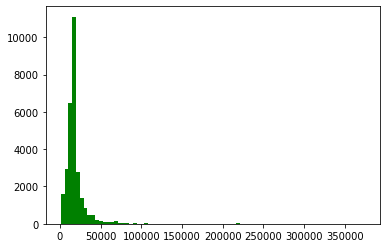

In [7]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

# plot histogram 
n, bins, patches = plt.hist(car_df['Price'], 80, facecolor='green')
plt.show()

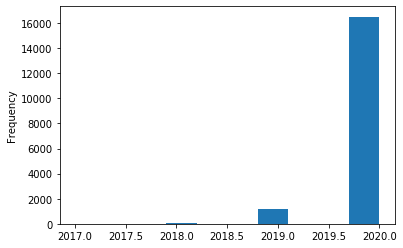

In [8]:
car_df[car_df.Title == "NEW"].Year.plot.hist()

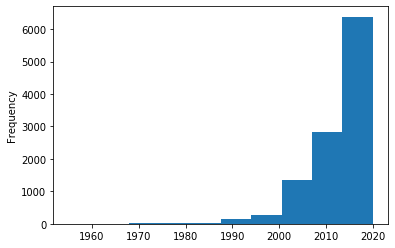

In [9]:
car_df[car_df.Title == "USED"].Year.plot.hist()

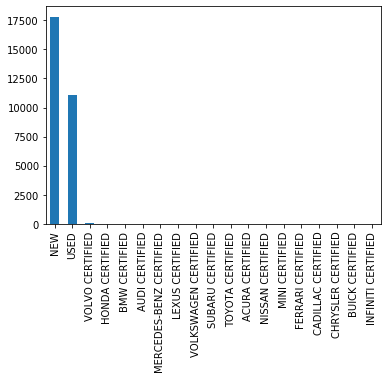

In [10]:
car_df["Title"].value_counts().plot.bar()

After checking our categories vs prices we can look at scatter of price vs year to find outliers : 

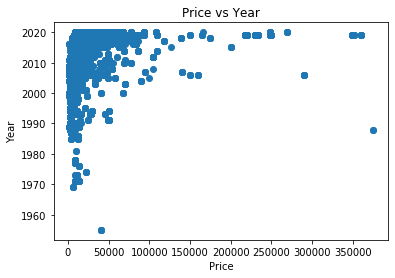

In [11]:
fig=plt.figure()
plt.scatter(car_df.Price, car_df.Year)
axis = fig.gca() #get current axis
axis.set_title('Price vs Year')
axis.set_xlabel('Price')
axis.set_ylabel('Year')
fig.canvas.draw()

Now lets have some boxplot to understand and visialization more on these two categories :

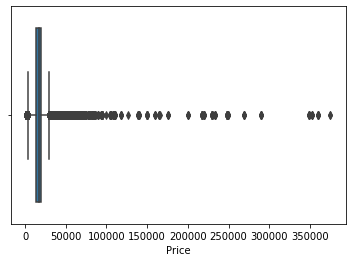

In [12]:
import seaborn as sns
sns.boxplot(x=car_df["Price"])

In [13]:
pd.options.display.max_rows = 16
print(car_df.loc[car_df['Price'].idxmax()])

Year                         1988
Brand                 Lamborghini
Model          Countach LP5000 QV
Title                        USED
Mile                            0
Price                      375000
Transmition                Manual
EXT_COLOR                   Black
INT_COLOR                   Black
Derivtrain                    RWD
zipcode                     66203
Name: 21535, dtype: object


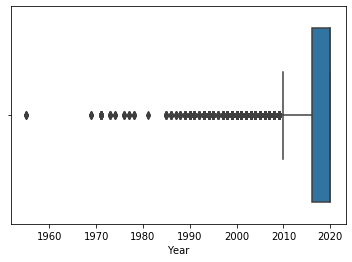

In [14]:
sns.boxplot(x=car_df["Year"])

In [15]:
pd.options.display.max_rows = 16
print(car_df.loc[car_df['Year'].idxmin()])

Year                          1955
Brand                         Ford
Model          Thunderbird Premium
Title                         USED
Mile                         78000
Price                        39995
Transmition              Automatic
EXT_COLOR                    Black
INT_COLOR                      Red
Derivtrain                     RWD
zipcode                      92521
Name: 4083, dtype: object


In [16]:
car_df = car_df[car_df.Year > 1955]

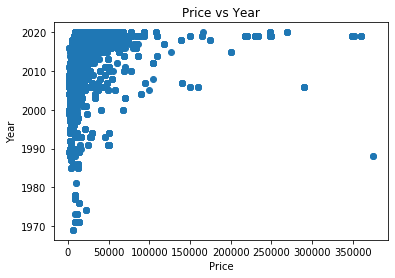

In [17]:
fig=plt.figure()
plt.scatter(car_df.Price, car_df.Year)
axis = fig.gca() #get current axis
axis.set_title('Price vs Year')
axis.set_xlabel('Price')
axis.set_ylabel('Year')
fig.canvas.draw()

Here we can see our outliers in the scater plot, and we can go ahead and remove them from our data :

In [18]:
car_df = car_df[car_df.Price < 375000]

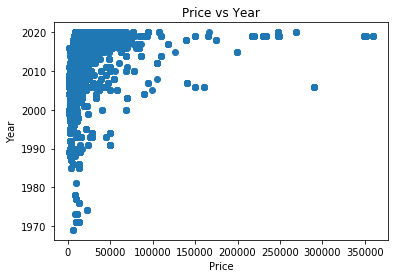

In [19]:
fig=plt.figure()
plt.scatter(car_df.Price, car_df.Year)
axis = fig.gca() #get current axis
axis.set_title('Price vs Year')
axis.set_xlabel('Price')
axis.set_ylabel('Year')
fig.canvas.draw()

In [20]:
car_df['Brand'].value_counts()

Chevrolet     14592
Nissan         3126
Ford           1512
Hyundai         821
Dodge           686
              ...  
Suzuki           10
Plymouth          8
Oldsmobile        8
MG                8
Geo               6
Name: Brand, Length: 53, dtype: int64

In [21]:
from matplotlib import pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
from pandas.tools.plotting import parallel_coordinates
parallel_coordinates(car_df[['Brand', 'Price', 'Year']],"Brand")

ModuleNotFoundError: No module named 'pandas.tools'